# Pandas Analysis and mult-indexing

In [5]:
import pandas as pd
import datetime
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(rc={'figure.figsize':(12,6)})
plt.style.use(['seaborn-whitegrid'])

import warnings
warnings.simplefilter('ignore')

import utils

Recap from previous notebook

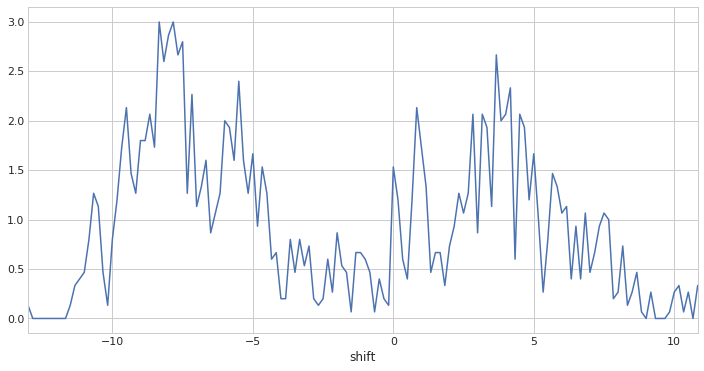

In [30]:
freq = "10min"

df = pd.read_csv("data/comfort_data.csv.gz",  compression='gzip')

# limit the data a bit...
qry = ["solar==0",
       "days==14",
       "feeder=='one'",
       "control==0",
       "season=='summer'",
       "attribute=='shower demand 110'",
       "strategy in ['no_control']"]

tmp = df.query(" and ".join(qry))
tmp.timestamp = pd.to_datetime(tmp.timestamp)

pivot = tmp.pivot_table(index='shift', 
                        columns=['day', 'name'], 
                        values='value', 
                        aggfunc='count')  

pivot = pivot.sum(axis=1, level=0).fillna(0)

dt_index = pd.to_datetime("2013-07-01 13:00:00") + pivot.index.map(lambda x: datetime.timedelta(hours=x))
sample = pivot.set_index(dt_index).resample(freq).sum().fillna(0)
sample.index = (sample.index - pd.to_datetime("2013-07-01 13:00:00")).map(lambda x: x.total_seconds()/60./60.)

sample1 = sample.mean(axis=1)

sample1.plot()

## Compare many simulations

In [42]:
qry = ["feeder=='one'",
       "season=='summer'",
       "attribute=='shower demand 110'"]

# qry = ["feeder=='one'",
#        "season=='summer'",
#        "attribute=='shower demand 110'",
#        "solar==0",
#        "days==14",
#        "control==0",
#        "strategy in ['no_control']"]

tmp = df.query(" and ".join(qry))
tmp.timestamp = pd.to_datetime(tmp.timestamp)

In [43]:
pivot = tmp.pivot_table(index='shift', 
                         columns=['solar', 'days',  'control', 'strategy', 'day', 'name'], 
                         values='value', 
                         aggfunc='count')
pivot.head()

solar                      0                                           \
days                       14                                           
control                    0                                            
strategy           no_control                                           
day                        1                                            
name       zmq_waterheater_19 zmq_waterheater_194 zmq_waterheater_288   
shift                                                                   
-12.966667                NaN                 NaN                 NaN   
-12.950000                NaN                 NaN                 NaN   
-12.933333                NaN                 NaN                 NaN   
-12.916667                NaN                 NaN                 NaN   
-12.466667                NaN                 NaN                 NaN   

solar                                                                   \
days                                                                     
control                                                                  
strategy                                                                 
day                                                                      
name       zmq_waterheater_393 zmq_waterheater_411 zmq_waterheater_468   
shift                                                                    
-12.966667                 NaN                 NaN                 NaN   
-12.950000                 NaN                 NaN                 NaN   
-12.933333                 NaN                 NaN                 NaN   
-12.916667                 NaN                 NaN                 NaN   
-12.466667                 NaN                 NaN                 NaN   

solar                                                                 \
days                                                                   
control                                                                
strategy                                                               
day                                                                    
name       zmq_waterheater_5 zmq_waterheater_505 zmq_waterheater_510   
shift                                                                  
-12.966667               NaN                 NaN                 NaN   
-12.950000               NaN                 NaN                 NaN   
-12.933333               NaN                 NaN                 NaN   
-12.916667               NaN                 NaN                 NaN   
-12.466667               NaN                 NaN                 NaN   

solar                           ...                  25                      \
days                            ...                  14                       
control                         ...                  25                       
strategy                        ...              smooth                       
day                             ...                  31                       
name       zmq_waterheater_561  ... zmq_waterheater_877 zmq_waterheater_903   
shift                           ...                                           
-12.966667                 NaN  ...                 NaN                 NaN   
-12.950000                 NaN  ...                 NaN                 NaN   
-12.933333                 NaN  ...                 NaN                 NaN   
-12.916667                 NaN  ...                 NaN                 NaN   
-12.466667                 NaN  ...                 NaN                 NaN   

solar                                                                   \
days                                                                     
control                                                                  
strategy                                                                 
day                                                                      
name       zmq_waterheater_906 zmq_waterheater_908

In [44]:
pivot = pivot.sum(axis=1, level=[0,1,2,3,4]).fillna(0)
pivot.head()

solar              0                                                ...  \
days               14                                               ...   
control            0                                                ...   
strategy   no_control                                               ...   
day                1    2    3    4    5    6    7    8    9    26  ...   
shift                                                               ...   
-12.966667        0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   
-12.950000        0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   
-12.933333        0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  ...   
-12.916667        0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  ...   
-12.466667        0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   

solar          25                                               
days           14                                               
control        25                                               
strategy   smooth                                               
day            6    7    8    9    26   27   28   29   30   31  
shift                                                           
-12.966667    0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
-12.950000    0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
-12.933333    0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
-12.916667    0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
-12.466667    0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  

[5 rows x 330 columns]

In [45]:
dt_index = pd.to_datetime("2013-07-01 13:00:00") + pivot.index.map(lambda x: datetime.timedelta(hours=x))
sample = pivot.set_index(dt_index).resample(freq).sum().fillna(0)
sample.index = (sample.index - pd.to_datetime("2013-07-01 13:00:00")).map(lambda x: x.total_seconds()/60./60.)

sample.head()

solar              0                                                ...  \
days               14                                               ...   
control            0                                                ...   
strategy   no_control                                               ...   
day                1    2    3    4    5    6    7    8    9    26  ...   
shift                                                               ...   
-13.000000        0.0  0.0  0.0  0.0  0.0  0.0  2.0  0.0  0.0  0.0  ...   
-12.833333        0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   
-12.666667        0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   
-12.500000        0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   
-12.333333        0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   

solar          25                                               
days           14                                               
control        25                                               
strategy   smooth                                               
day            6    7    8    9    26   27   28   29   30   31  
shift                                                           
-13.000000    0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
-12.833333    0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
-12.666667    0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
-12.500000    0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
-12.333333    0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  

[5 rows x 330 columns]

In [46]:
sample = sample.mean(axis=1, level=[0,1,2,3])
sample.head()

solar              0                                              \
days               14                                              
control            0                                6              
strategy   no_control no_control_battery single_bucket    smooth   
shift                                                              
-13.000000   0.133333           0.133333      0.133333  0.133333   
-12.833333   0.000000           0.000000      0.000000  0.000000   
-12.666667   0.000000           0.000000      0.000000  0.000000   
-12.500000   0.000000           0.000000      0.000000  0.000000   
-12.333333   0.000000           0.000000      0.000000  0.000000   

solar                                                                    \
days                                                                      
control               25                                                  
strategy   single_bucket single_bucket_battery    smooth smooth_battery   
shift                                                                     
-13.000000      0.133333              0.133333  0.133333       0.133333   
-12.833333      0.000000              0.000000  0.000000       0.000000   
-12.666667      0.000000              0.000000  0.000000       0.000000   
-12.500000      0.000000              0.000000  0.000000       0.000000   
-12.333333      0.000000              0.000000  0.000000       0.000000   

solar                            ...         5                        \
days                             ...         14                        
control               50         ...         0             2           
strategy   single_bucket smooth  ... no_control single_bucket smooth   
shift                            ...                                   
-13.000000      0.133333    0.2  ...        0.0           0.0    0.0   
-12.833333      0.000000    0.0  ...        0.0           0.0    0.0   
-12.666667      0.000000    0.0  ...        0.0           0.0    0.0   
-12.500000      0.000000    0.0  ...        0.0           0.0    0.0   
-12.333333      0.000000    0.0  ...        0.0           0.0    0.0   

solar                                   25                                     \
days                                    14                                      
control               25                0             2                    25   
strategy   single_bucket smooth no_control single_bucket smooth single_bucket   
shift                                                                           
-13.000000           0.0    0.0        0.0           0.0    0.0           0.0   
-12.833333           0.0    0.0        0.0           0.0    0.0           0.0   
-12.666667           0.0    0.0        0.0           0.0    0.0           0.0   
-12.500000           0.0    0.0        0.0           0.0    0.0           0.0   
-12.333333           0.0    0.0        0.0           0.0    0.0           0.0   

solar              
days               
control            
strategy   smooth  
shift              
-13.000000    0.0  
-12.833333    0.0  
-12.666667    0.0  
-12.500000    0.0  
-12.333333    0.0  

[5 rows x 22 columns]

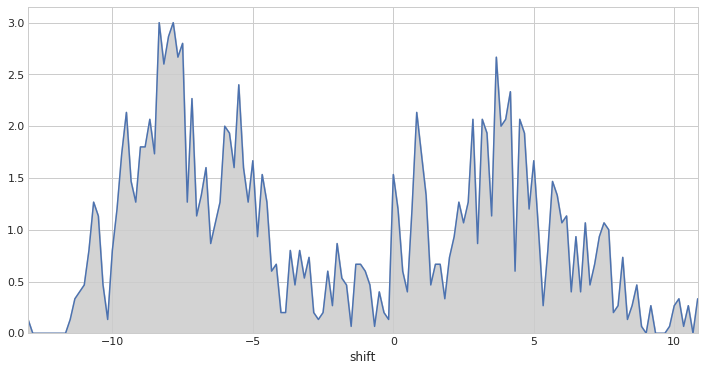

In [58]:
sample[(0, 14, 0, 'no_control')].plot() 

sample1.plot(kind='area', color='lightgrey', zorder=-1)

### Compare strategies 

In [60]:
pivot = tmp.pivot_table(index='shift', 
                         columns=['feeder', 'season', 'strategy', 'control', 'day', 'name'], 
                         values='value', 
                         aggfunc='count')

pivot = pivot.sum(axis=1, level=[0,1,2,3,4]).fillna(0)

dt_index = pd.to_datetime("2013-07-01 13:00:00") + pivot.index.map(lambda x: datetime.timedelta(hours=x))
sample = pivot.set_index(dt_index).resample(freq).sum().fillna(0)
sample.index = (sample.index - pd.to_datetime("2013-07-01 13:00:00")).map(lambda x: x.total_seconds()/60./60.)

sample = sample.mean(axis=1, level=[0,1,2,3])

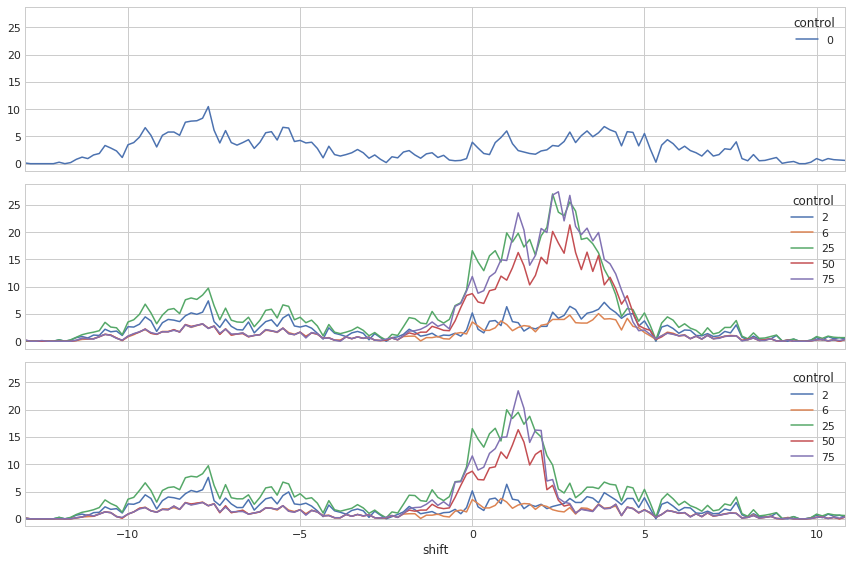

In [66]:
fig, ax = plt.subplots(3,1, figsize=(12,8), sharex=True, sharey=True)

sample[('one', 'summer', 'no_control')].plot(ax=ax[0])
sample[('one', 'summer', 'smooth')].plot(ax=ax[1])
sample[('one', 'summer', 'single_bucket')].plot(ax=ax[2])

plt.tight_layout()

## Question #2

### What is the average cumulative % of customers impacted as a function of time?

Count a customer as unsatisfied only once...

Warm up

In [81]:
qry = ["feeder=='one'",
       "season=='summer'",
       "control==0",
       "solar==0",
       "days==14",
       "strategy in ['no_control', 'smooth', 'single_bucket']",
       "attribute=='shower demand 110'"]

tmp = df.query(" and ".join(qry))

In [98]:
counts = tmp.pivot_table(index='shift', columns=['day', 'name'], values='value', aggfunc='count')
counts.head()

day                        1                                           \
name       zmq_waterheater_11 zmq_waterheater_113 zmq_waterheater_122   
shift                                                                   
-12.966667                NaN                 NaN                 NaN   
-12.950000                NaN                 NaN                 NaN   
-12.933333                NaN                 NaN                 NaN   
-12.916667                NaN                 NaN                 NaN   
-12.466667                NaN                 NaN                 NaN   

day                                                                    \
name       zmq_waterheater_139 zmq_waterheater_14 zmq_waterheater_146   
shift                                                                   
-12.966667                 NaN                NaN                 NaN   
-12.950000                 NaN                NaN                 NaN   
-12.933333                 NaN                NaN                 NaN   
-12.916667                 NaN                NaN                 NaN   
-12.466667                 NaN                NaN                 NaN   

day                                                                   \
name       zmq_waterheater_154 zmq_waterheater_18 zmq_waterheater_19   
shift                                                                  
-12.966667                 NaN                NaN                NaN   
-12.950000                 NaN                NaN                NaN   
-12.933333                 NaN                NaN                NaN   
-12.916667                 NaN                NaN                NaN   
-12.466667                 NaN                NaN                NaN   

day                             ...                  31                      \
name       zmq_waterheater_191  ... zmq_waterheater_963 zmq_waterheater_967   
shift                           ...                                           
-12.966667                 NaN  ...                 NaN                 NaN   
-12.950000                 NaN  ...                 NaN                 NaN   
-12.933333                 NaN  ...                 NaN                 NaN   
-12.916667                 NaN  ...                 NaN                 NaN   
-12.466667                 NaN  ...                 NaN                 NaN   

day                                                                     \
name       zmq_waterheater_971 zmq_waterheater_973 zmq_waterheater_980   
shift                                                                    
-12.966667                 NaN                 NaN                 NaN   
-12.950000                 NaN                 NaN                 NaN   
-12.933333                 NaN                 NaN                 NaN   
-12.916667                 NaN                 NaN                 NaN   
-12.466667                 NaN                 NaN                 NaN   

day                                                                     \
name       zmq_waterheater_982 zmq_waterheater_983 zmq_waterheater_984   
shift                                                                    
-12.966667                 NaN                 NaN                 NaN   
-12.950000                 NaN                 NaN                 NaN   
-12.933333                 NaN                 NaN                 NaN   
-12.916667                 NaN                 NaN                 NaN   
-12.466667                 NaN                 NaN                 NaN   

day                                                
name       zmq_waterheater_986 zmq_waterheater_99  
shift                                              
-12.966667                 NaN                NaN  
-12.950000                 NaN                NaN  
-12.933333                 NaN                NaN  
-12.916667                 NaN                NaN  
-12.466667                 NaN                NaN  

[5 rows x 2512 co

In [105]:
import numpy as np

def fill_first_index(df):
    zeros = np.zeros(df.shape[0])
    index = df.first_valid_index()

    if index is not None:
        tmp = pd.Series(zeros, index=df.index)
        tmp.loc[tmp.index==index] = 1.0
        return tmp
    
    return pd.Series(zeros, index=df.index)

In [106]:
trial = counts[1, 'zmq_waterheater_19']

trial.sum(), fill_first_index(trial).sum()

(44.0, 1.0)

We can `apply` this to the columns (`axis=0`) of our dataframe.

In [84]:
final = counts.apply(fill_first_index, axis=0)
final.head()

day                        1                                           \
name       zmq_waterheater_19 zmq_waterheater_194 zmq_waterheater_288   
shift                                                                   
-12.933333                0.0                 0.0                 0.0   
-12.916667                0.0                 0.0                 0.0   
-11.366667                0.0                 0.0                 0.0   
-11.350000                0.0                 0.0                 0.0   
-11.333333                0.0                 0.0                 0.0   

day                                                                     \
name       zmq_waterheater_393 zmq_waterheater_411 zmq_waterheater_468   
shift                                                                    
-12.933333                 0.0                 0.0                 0.0   
-12.916667                 0.0                 0.0                 0.0   
-11.366667                 0.0                 0.0                 0.0   
-11.350000                 0.0                 0.0                 0.0   
-11.333333                 0.0                 0.0                 0.0   

day                                                                   \
name       zmq_waterheater_5 zmq_waterheater_505 zmq_waterheater_510   
shift                                                                  
-12.933333               0.0                 0.0                 0.0   
-12.916667               0.0                 0.0                 0.0   
-11.366667               0.0                 0.0                 0.0   
-11.350000               0.0                 0.0                 0.0   
-11.333333               0.0                 0.0                 0.0   

day                             ...                  31                      \
name       zmq_waterheater_561  ... zmq_waterheater_721 zmq_waterheater_744   
shift                           ...                                           
-12.933333                 0.0  ...                 0.0                 0.0   
-12.916667                 0.0  ...                 0.0                 0.0   
-11.366667                 0.0  ...                 0.0                 0.0   
-11.350000                 0.0  ...                 0.0                 0.0   
-11.333333                 0.0  ...                 0.0                 0.0   

day                                                                     \
name       zmq_waterheater_802 zmq_waterheater_849 zmq_waterheater_863   
shift                                                                    
-12.933333                 0.0                 0.0                 0.0   
-12.916667                 0.0                 0.0                 0.0   
-11.366667                 0.0                 0.0                 0.0   
-11.350000                 0.0                 0.0                 0.0   
-11.333333                 0.0                 0.0                 0.0   

day                                                                     \
name       zmq_waterheater_876 zmq_waterheater_908 zmq_waterheater_935   
shift                                                                    
-12.933333                 0.0                 0.0                 0.0   
-12.916667                 0.0                 0.0                 0.0   
-11.366667                 0.0                 0.0                 0.0   
-11.350000                 0.0                 1.0                 0.0   
-11.333333                 0.0                 0.0                 0.0   

day                                                 
name       zmq_waterheater_946 zmq_waterheater_971  
shift                                               
-12.933333                 0.0                 0.0  
-12.916667                 0.0                 0.0  
-11.366667                 0.0                 0.0  
-11.350000                 0.0                 0.0  
-11.333333                 0.0                 0.0  

[

Check that we only have a single value per day and waterheater

In [85]:
final.sum(axis=0).unique()

array([1.])

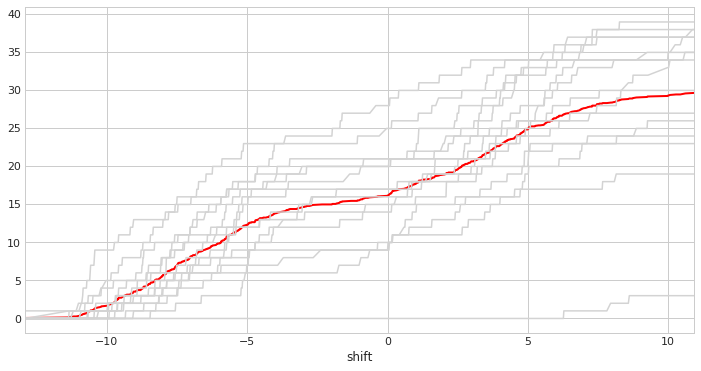

In [90]:
ax = final.sum(axis=1, level=0).cumsum().mean(axis=1).plot(lw=2, color='red')

final.sum(axis=1, level=0).cumsum().plot(legend=False, color='lightgrey', ax=ax)

Remember this number?

### Multiple Scenarios 

In [92]:
qry = ["feeder=='one'",
       "season=='summer'",
       "attribute=='shower demand 110'"]

tmp = df.query(" and ".join(qry))

counts = tmp.pivot_table(index='shift', 
                         columns=['feeder', 'season', 'strategy', 'control', 'day', 'name'], 
                         values='value', aggfunc='count')
counts.head()

feeder                     one                                         \
season                  summer                                          
strategy            no_control                                          
control                     0                                           
day                         1                                           
name       zmq_waterheater_139 zmq_waterheater_19 zmq_waterheater_191   
shift                                                                   
-12.966667                 NaN                NaN                 NaN   
-12.950000                 NaN                NaN                 NaN   
-12.933333                 NaN                NaN                 NaN   
-12.916667                 NaN                NaN                 NaN   
-12.466667                 NaN                NaN                 NaN   

feeder                                                                \
season                                                                 
strategy                                                               
control                                                                
day                                                                    
name       zmq_waterheater_194 zmq_waterheater_2 zmq_waterheater_204   
shift                                                                  
-12.966667                 NaN               NaN                 NaN   
-12.950000                 NaN               NaN                 NaN   
-12.933333                 NaN               NaN                 NaN   
-12.916667                 NaN               NaN                 NaN   
-12.466667                 NaN               NaN                 NaN   

feeder                                                                  \
season                                                                   
strategy                                                                 
control                                                                  
day                                                                      
name       zmq_waterheater_216 zmq_waterheater_280 zmq_waterheater_288   
shift                                                                    
-12.966667                 NaN                 NaN                 NaN   
-12.950000                 NaN                 NaN                 NaN   
-12.933333                 NaN                 NaN                 NaN   
-12.916667                 NaN                 NaN                 NaN   
-12.466667                 NaN                 NaN                 NaN   

feeder                          ...                                          \
season                          ...                                           
strategy                        ...      smooth_battery                       
control                         ...                  25                       
day                             ...                  31                       
name       zmq_waterheater_289  ... zmq_waterheater_802 zmq_waterheater_827   
shift                           ...                                           
-12.966667                 NaN  ...                 NaN                 NaN   
-12.950000                 NaN  ...                 NaN                 NaN   
-12.933333                 NaN  ...                 NaN                 NaN   
-12.916667                 NaN  ...                 NaN                 NaN   
-12.466667                 NaN  ...                 NaN                 NaN   

feeder                                                                  \
season                                                                   
strategy                                                                 
control                                                                  
day                                                                      
name       zmq_waterheater_849 zmq_waterheater_863

In [93]:
first = counts.apply(fill_first_index, axis=0)
first.head()

feeder                     one                                         \
season                  summer                                          
strategy            no_control                                          
control                     0                                           
day                         1                                           
name       zmq_waterheater_139 zmq_waterheater_19 zmq_waterheater_191   
shift                                                                   
-12.966667                 0.0                0.0                 0.0   
-12.950000                 0.0                0.0                 0.0   
-12.933333                 0.0                0.0                 0.0   
-12.916667                 0.0                0.0                 0.0   
-12.466667                 0.0                0.0                 0.0   

feeder                                                                \
season                                                                 
strategy                                                               
control                                                                
day                                                                    
name       zmq_waterheater_194 zmq_waterheater_2 zmq_waterheater_204   
shift                                                                  
-12.966667                 0.0               0.0                 0.0   
-12.950000                 0.0               0.0                 0.0   
-12.933333                 0.0               0.0                 0.0   
-12.916667                 0.0               0.0                 0.0   
-12.466667                 0.0               0.0                 0.0   

feeder                                                                  \
season                                                                   
strategy                                                                 
control                                                                  
day                                                                      
name       zmq_waterheater_216 zmq_waterheater_280 zmq_waterheater_288   
shift                                                                    
-12.966667                 0.0                 0.0                 0.0   
-12.950000                 0.0                 0.0                 0.0   
-12.933333                 0.0                 0.0                 0.0   
-12.916667                 0.0                 0.0                 0.0   
-12.466667                 0.0                 0.0                 0.0   

feeder                          ...                                          \
season                          ...                                           
strategy                        ...      smooth_battery                       
control                         ...                  25                       
day                             ...                  31                       
name       zmq_waterheater_289  ... zmq_waterheater_802 zmq_waterheater_827   
shift                           ...                                           
-12.966667                 0.0  ...                 0.0                 0.0   
-12.950000                 0.0  ...                 0.0                 0.0   
-12.933333                 0.0  ...                 0.0                 0.0   
-12.916667                 0.0  ...                 0.0                 0.0   
-12.466667                 0.0  ...                 0.0                 0.0   

feeder                                                                  \
season                                                                   
strategy                                                                 
control                                                                  
day                                                                      
name       zmq_waterheater_849 zmq_waterheater_863

In [94]:
first.sum(axis=1, level=[0,1,2,3,4]).cumsum().head()

feeder            one                                               ...  \
season         summer                                               ...   
strategy   no_control                                               ...   
control            0                                                ...   
day                1    2    3    4    5    6    7    8    9    26  ...   
shift                                                               ...   
-12.966667        0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   
-12.950000        0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   
-12.933333        0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  ...   
-12.916667        0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  ...   
-12.466667        0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  ...   

feeder                                                                  
season                                                                  
strategy   smooth_battery                                               
control                25                                               
day                    6    7    8    9    26   27   28   29   30   31  
shift                                                                   
-12.966667            0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
-12.950000            0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
-12.933333            0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
-12.916667            0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
-12.466667            0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  

[5 rows x 210 columns]

In [95]:
final = first.sum(axis=1, level=[0,1,2,3,4]).cumsum().mean(axis=1, level=[0,1,2,3])

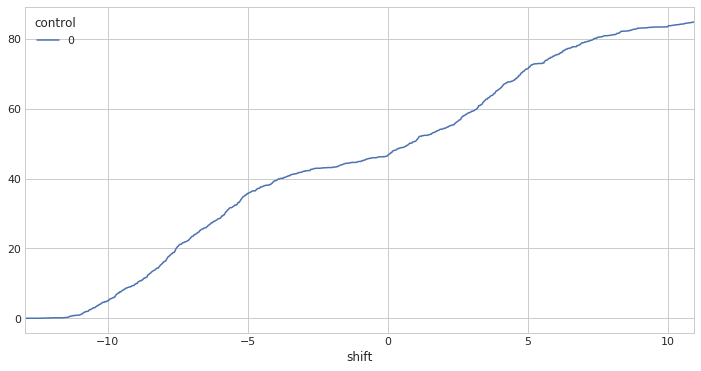

In [96]:
final[('one', 'summer', 'no_control')].plot()